In [2]:
import os
import sys
sys.path.append(os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/STable/"))
from STable_tools import read_stable, split_tubeids, read_wcsim_geometry

import itertools
import uproot
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/07


In [3]:
ROOT.gROOT.SetMacroPath("/pbs/home/g/gdiazlop/Software/HK_Software/fiTQun/install-Linux_x86_64-gcc_9-python_3.10.13/lib/")
ROOT.gROOT.LoadMacro("libfiTQunLib.so")

0

In [4]:
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/STable/scattables.root")

tables = read_stable(fname)

In [5]:
name = "sidescattable"
tab  =  tables[name]

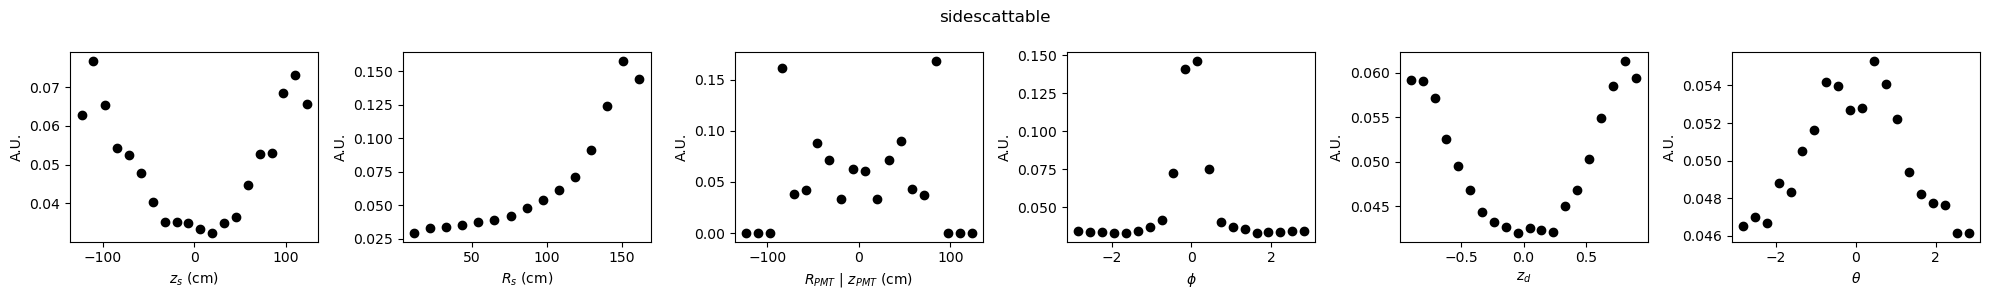

In [8]:
dims = list(range(6))
vars = {0:r"$z_s$ (cm)", 1:r"$R_s$ (cm)", 2:r"$R_{PMT} ~|~ z_{PMT}$ (cm)", 3:r"$\phi$", 4:r"$z_d$", 5:r"$\theta$"}

bins = tables[f"{name}_bins"]

plt.figure(figsize=[20, 3])
plt.suptitle(name)
for pax in range(0, 6):

    nbins  = bins[0][pax]
    bounds = bins[1][pax]
    dx = (bounds[-1] - bounds[0])/nbins
    x = np.linspace(bounds[0]+dx, bounds[-1]-dx, nbins)

    plt.subplot(1, 6, pax+1)
    # new
    proj = tab.sum(axis=tuple(np.delete(dims, pax)))
    plt.scatter(x, proj/np.sum(proj), color="k")

    plt.xlabel(vars[pax])
    plt.ylabel("A.U.")
plt.tight_layout()